<a href="https://colab.research.google.com/github/shivendr7/ml/blob/GANs/ModelGAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dense, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
def build_discriminator():
  model=Sequential()
  model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(28,28,1)))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  return model

In [3]:
def build_generator():
  model=Sequential()
  n_nodes=64*7*7
  model.add(Dense(n_nodes, input_dim=100))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Reshape((7,7,64)))
  model.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(1,(3,3),activation='tanh',padding='same'))
  model.summary()
  return model

In [4]:
64*7*7

3136

In [5]:
generator=build_generator()
discriminator=build_discriminator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3136)              316736    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3136)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [6]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
discriminator.trainable=False

In [7]:
GAN=Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0002,beta_1=0.5))

In [8]:
(train_images, train_labels), (_,_)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
train_images=(train_images-127.5)/127.5 #normalization

def generate_fake_samples(generator, latent_dim, n_batch):
  generated=generator.predict(tf.random.normal(shape=(n_batch, latent_dim)))
  return generated

def generate_latent_points(latent_dim, n_batch):
  return tf.random.normal(shape=(n_batch, latent_dim))

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
for i in range(1000):
  X_real, _=train_test_split(train_images, train_size=16)
  y_real=tf.ones(tf.constant([len(X_real)]))
  X_fake=generate_fake_samples(generator, 100, 16)
  y_fake=tf.zeros(tf.constant([len(X_fake)]))
  X,y=np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
  y=np.reshape(y, 32)
  d_loss=discriminator.train_on_batch(X,y)

In [10]:
discriminator.trainable=False

In [11]:
for i in range(10000):
  """
  X_real, _=train_test_split(train_images, train_size=16)
  y_real=tf.ones(tf.constant([len(X_real)]))
  X_fake=generate_fake_samples(generator, 100, 16)
  y_fake=tf.zeros(tf.constant([len(X_fake)]))
  X,y=np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
  y=np.reshape(y, 32)
  #d_loss=discriminator.train_on_batch(X,y)
  """
  X_gan=generate_latent_points(100, 16)
  y_gan=tf.ones((16, 1))
  g_loss=GAN.train_on_batch(X_gan, y_gan)
  print(g_loss, end=" ")

0.8329755067825317 0.8144506216049194 0.4266568124294281 0.6685840487480164 0.58824622631073 0.5336407423019409 0.3849160969257355 0.3043982982635498 0.7527251243591309 0.5802640914916992 0.31017616391181946 0.2758030295372009 0.20792724192142487 0.14344491064548492 0.24339675903320312 0.14471587538719177 0.24622726440429688 0.21198317408561707 0.3111066520214081 0.1109120324254036 0.18879643082618713 0.15183402597904205 0.09989216178655624 0.1030682772397995 0.16230544447898865 0.13167226314544678 0.12059959769248962 0.26197049021720886 0.13659535348415375 0.05049646645784378 0.07602083683013916 0.08756037056446075 0.06690530478954315 0.01801537536084652 0.06554357707500458 0.06814710050821304 0.1526709794998169 0.026836387813091278 0.04325377941131592 0.06136965751647949 0.019193332642316818 0.07040640711784363 0.02035018429160118 0.07940289378166199 0.023043133318424225 0.12205807864665985 0.01795842871069908 0.08155729621648788 0.07488910108804703 0.037921857088804245 0.01015435811

In [12]:
print(np.random.randint(1,100+1))

89


[[0.999997]]


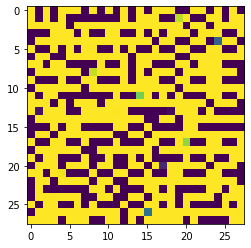

In [13]:
x=[[np.random.randint(1,100+1) for i in range(100)]] #seed
y=GAN.predict(x)
print(y)
yhat=generator.predict(x)
y_img=(yhat*127.5+127.5).astype('uint8')
plt.imshow(y_img.reshape(28,28))

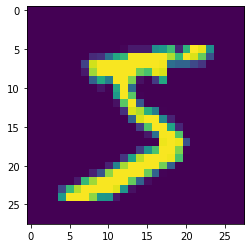

In [14]:
plt.imshow((train_images[0]*127.5+127.5).reshape(28,28))

In [15]:
dig_5=(train_images[10]).reshape(1,28,28,1)
discriminator.predict(dig_5)


array([[0.99997544]], dtype=float32)

In [16]:
X, _=train_test_split(train_images, train_size=16)
discriminator.predict(X), X.shape

(array([[0.9999995 ],
        [0.99999046],
        [0.9999943 ],
        [0.9999949 ],
        [0.9999979 ],
        [0.9999665 ],
        [0.9999777 ],
        [0.9999951 ],
        [0.9999969 ],
        [0.99999535],
        [0.99999654],
        [0.9999881 ],
        [0.9999808 ],
        [0.99999547],
        [0.9999912 ],
        [0.9999945 ]], dtype=float32), (16, 28, 28, 1))

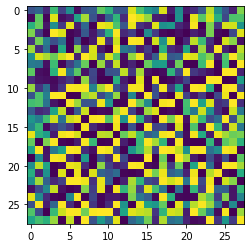

In [17]:
X=generate_latent_points(100, 2)
img_res= generator.predict(X)
plt.imshow((img_res[0]*127.5+127.5).reshape(28,28))

[[ 64  80  29 174  50 125   9  66  74 193 164  67  66 240 181 135 112 240
   20 125  18  33  71 227 127  66  22 206]
 [  6 191   4 242   8  20 148 221  64  15  81 166  32 254 242 213  21  18
    5 130   2 245 189 238 162  55 184 184]
 [161 195  14 126  42 244  20  85   1 247 241 183  68 246  36  21 241 127
  135  28  11 251   1 204  38 238 236 133]
 [204  45   3 254 241   3  10  70  16  61 163 253  29  46   4 123  45   6
    1  10   1  22  10 204   6   0  55 242]
 [ 38 199 107  61  94   0  64   0  19 248  35 235   1 254 252   6 236 130
  242   2  28 229 174  33   1 238 209  10]
 [217  33  94   5 153   0 214  39 240  18   0 251 101  85  17  43   1 163
   30  18 150  11 216  22 253  23   3 229]
 [127 239 222 197 236 254  23 254 239  62 239 185  10 214 250  27  75 233
   69  77 246 240 183 208  20 184 253 211]
 [105 100  11 175   4  49  95 195   0 215  34 231   7  25   0 195 139 142
   18 198   2   0 175 252   2 177   0 254]
 [190  10   6 163 251 100 189  13  54   4  62  65 230  41 220  1

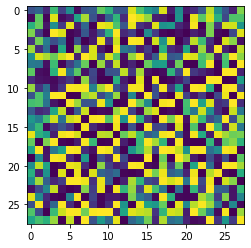

In [18]:
print((img_res[0]*127.5+127.5).astype('uint8').reshape(28,28))
plt.imshow((img_res[0]*127.5+127.5).astype('uint8').reshape(28,28))

In [23]:
discriminator.predict(img_res), discriminator.predict(train_images[0].reshape(1,28,28,1))

(array([[0.9999986 ],
        [0.99999726]], dtype=float32), array([[0.9999964]], dtype=float32))

In [27]:
print(tf.random.normal(shape=(1,100)))
discriminator.predict(generator.predict(tf.random.normal(shape=(1,100)))) # :(

tf.Tensor(
[[ 0.23416498  0.76535064 -0.5483314  -1.9786133   1.143059    0.40321437
   0.89634967 -0.88503087  1.2665728   0.8265475  -0.05070245  0.42739677
   0.5426545  -0.11814041  0.72415763  1.1656835   1.1206578   0.39572006
   1.7033163   1.6238604   1.1948292   0.83060473  1.740512    0.17757615
  -1.5739805   1.5389903   1.223993    1.2528931  -0.04309951 -0.50338167
   0.57864267  2.4350002  -0.40322042  0.06094537 -2.0281403   0.5832251
  -0.76063365  0.49132892  1.3954047  -1.4926198   0.61541986  0.79702824
   0.5663846   0.84746075  1.3430052   0.00730308  1.1470531  -1.6465136
   0.4172296   1.118266   -0.39126733  0.21386324 -0.05076325  0.76705265
   1.0349635  -0.28391668 -0.48198655 -0.4457553   0.3511816   0.82227033
  -0.93358785 -0.47797483 -0.73024905  0.19844444 -0.90067065 -1.4965683
  -0.03118928  0.6049788  -0.16586778 -1.0848625   0.792996    0.547029
  -0.1793493  -0.7244132  -0.8328911  -0.56858665  1.429362   -1.799108
   0.90768886 -0.15952305 -0.25373

array([[0.9999998]], dtype=float32)